In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.cluster import KMeans

(-0.5, 1125.5, 633.5, -0.5)

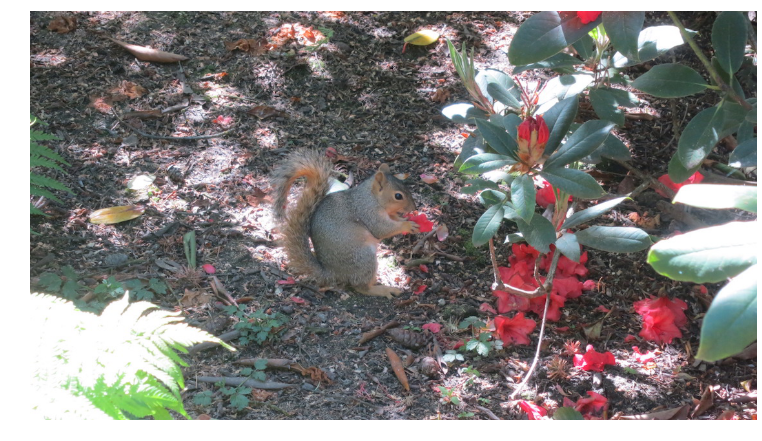

In [4]:
# Load and display image
img = mpimg.imread("2014-05-20_Squirrel.jpg")
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow(img)
ax.axis('off')

(-0.5, 1125.5, 633.5, -0.5)

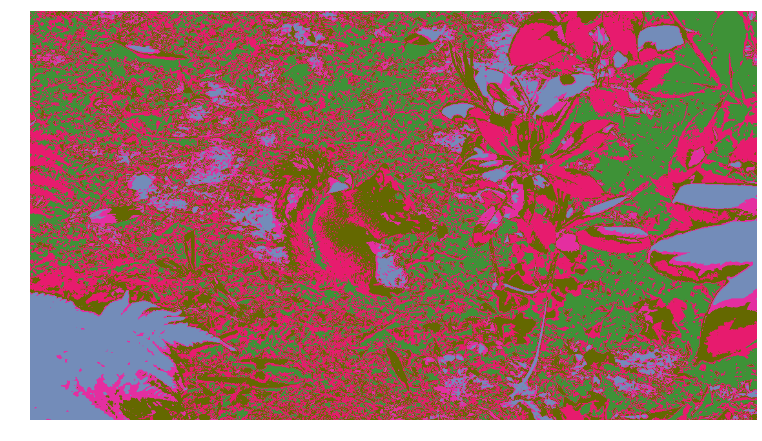

In [5]:
# Reduce number of colors using kmeans clustering
k = 5
pixels = [pixel for row in img for pixel in row]
colorclusters = KMeans(n_clusters=k).fit(pixels)
colors = colorclusters.cluster_centers_
pixelcluster = colorclusters.predict(pixels)
newimg = np.reshape([colors[p] for p in pixelcluster], img.shape)
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow(newimg)
ax.axis('off')

(-0.5, 1125.5, 633.5, -0.5)

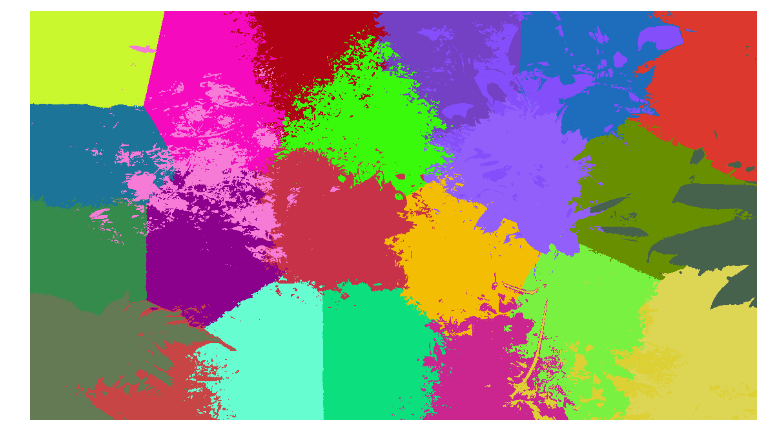

In [7]:
# Find regions using kmeans clustering
k = 25
pixelregion = [np.append(pixel, [r,c]) for r, row in enumerate(img) for c, pixel in enumerate(row)]
pixelclusters = KMeans(n_clusters=k).fit(pixelregion)
colors = [c[:3] for c in pixelclusters.cluster_centers_]
pixelcluster = pixelclusters.predict(pixelregion)
newimg2 = np.reshape([colors[p] for p in pixelcluster], img.shape)
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow(newimg2)
ax.axis('off')

### Suggested Exercise

Why are the k-means cluster center colors so far from the true values? Make a 3D scatter plot of the pixel RGB values along with the cluster centers - does this provide any illumination to the problem?